Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [5]:
pwd

'C:\\Users\\JuanManuel\\Ciencias\\lab-analisis-exploratorio-de-datos-jmmarinq'

In [7]:
#Importar las librerias
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob
%matplotlib inline


In [8]:
#Definir la funcion Leer Precios definida en Clases
def LeerPrecios(filename):
    for x in range(10):
        Datos = pd.read_excel(filename,skiprows = x ,usecols = list(range(25)))
        if Datos.iloc[0,0] == 'Fecha':
            Datos = pd.read_excel(filename,skiprows = x+1, usecols = list(range(25)))
            break
    return Datos

In [9]:
#Hago el vector filenames manualmente ya que mi maquina virtual se averio
filenames=['Precio_Bolsa_Nacional_($kwh)_1995.xlsx','Precio_Bolsa_Nacional_($kwh)_1996.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_1997.xlsx','Precio_Bolsa_Nacional_($kwh)_1998.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_1999.xlsx','Precio_Bolsa_Nacional_($kwh)_2000.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_2001.xlsx','Precio_Bolsa_Nacional_($kwh)_2002.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_2003.xlsx','Precio_Bolsa_Nacional_($kwh)_2004.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_2005.xlsx','Precio_Bolsa_Nacional_($kwh)_2006.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_2007.xlsx','Precio_Bolsa_Nacional_($kwh)_2008.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_2009.xlsx','Precio_Bolsa_Nacional_($kwh)_2010.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_2011.xlsx','Precio_Bolsa_Nacional_($kwh)_2012.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_2013.xlsx','Precio_Bolsa_Nacional_($kwh)_2014.xlsx',
           'Precio_Bolsa_Nacional_($kwh)_2015.xlsx','Precio_Bolsa_Nacional_($kwh)_2016.xls',
           'Precio_Bolsa_Nacional_($kwh)_2017.xls','Precio_Bolsa_Nacional_($kwh)_2018.xls']
filenames

['Precio_Bolsa_Nacional_($kwh)_1995.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_1996.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_1997.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_1998.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_1999.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2000.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2001.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2002.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2003.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2004.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2005.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2006.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2007.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2008.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2009.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2010.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2011.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2012.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2013.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2014.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2015.xlsx',
 'Precio_Bolsa_Nacional_($kwh)_2016.xls',
 'Precio_Bolsa_Nacional_($kwh)_2017.xls',
 'Precio_Bols

In [10]:
#Consolidar la base
Datos = []
for filename in filenames:
    Datos.append(LeerPrecios("precio/"+filename))
Datos = pd.concat(Datos)
Datos = pd.melt(Datos,id_vars = 'Fecha')
Datos.columns = ['Fecha','Hora','Precio']
print(Datos)

             Fecha Hora      Precio
0       1995-07-20    0         NaN
1       1995-07-21    0    1.073000
2       1995-07-22    0    1.073000
3       1995-07-23    0    1.073000
4       1995-07-24    0    1.000000
5       1995-07-25    0    0.990000
6       1995-07-26    0    0.500000
7       1995-07-27    0    0.500000
8       1995-07-28    0    0.000000
9       1995-07-29    0    1.000000
10      1995-07-30    0    1.072000
11      1995-07-31    0    0.000000
12      1995-08-01    0    0.000000
13      1995-08-02    0    1.073000
14      1995-08-03    0    1.073000
15      1995-08-04    0    1.073000
16      1995-08-05    0    2.000000
17      1995-08-06    0    3.000000
18      1995-08-07    0    3.000000
19      1995-08-08    0    3.000000
20      1995-08-09    0   10.000000
21      1995-08-10    0   18.000000
22      1995-08-11    0   12.000000
23      1995-08-12    0   30.000000
24      1995-08-13    0   35.000000
25      1995-08-14    0   17.000000
26      1995-08-15    0    1

**2.--** Compute e imprima el número de registros con datos faltantes.

In [11]:
#Punto 2 Definido en Clases
SinNa=Datos.dropna()
print(Datos.shape[0]-SinNa.shape[0])

238


**3.--** Compute e imprima el número de registros duplicados.

In [13]:
#Punto 2 Definido en Clases
SinNa=Datos.dropna()
print(Datos.shape[0]-SinNa.shape[0])

238


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [14]:
##Punto 4
Datos2=Datos.copy()
Datos2=(Datos2.drop_duplicates())
Datos2=Datos2.dropna()
Datos2.shape[0]

199819

**5.--** Compute y grafique el precio primedio diario.

Text(0.5, 1.0, 'Precio_promedio_Diario')

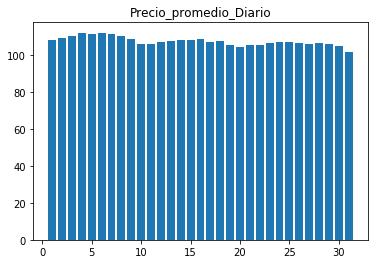

In [23]:
#Punto 5
Datos3 = Datos2.copy()
Datos3['Dia'] = pd.DatetimeIndex(Datos3['Fecha']).day
Dia=Datos3.groupby('Dia')['Precio'].mean()
plt.bar(Dia.index, Dia)
plt.title('Precio_promedio_Diario')

**6.--** Compute y grafique el precio máximo por mes.

Text(0.5, 1.0, 'Precio_Maximo_mensual')

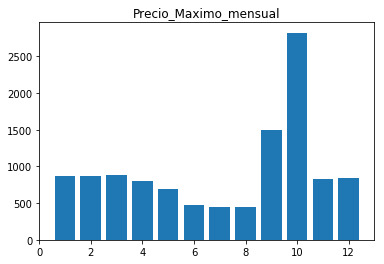

In [25]:
Datos3['Mes'] = pd.DatetimeIndex(Datos3['Fecha']).month
Mes=Datos3.groupby('Mes')['Precio'].max()
plt.bar(Mes.index, Mes)
plt.title('Precio_Maximo_mensual')

**7.--** Compute y grafique el precio mínimo mensual.

Text(0.5, 1.0, 'Precio_Minimo_mensual')

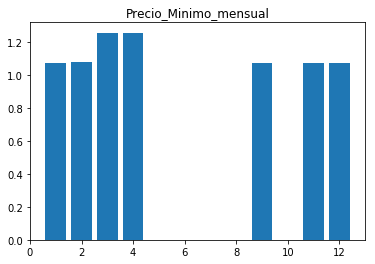

In [26]:
Datos3['Mes'] = pd.DatetimeIndex(Datos3['Fecha']).month
Mes=Datos3.groupby('Mes')['Precio'].min()
plt.bar(Mes.index, Mes)
plt.title('Precio_Minimo_mensual')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0.5, 1.0, 'Precio promedio mensual')

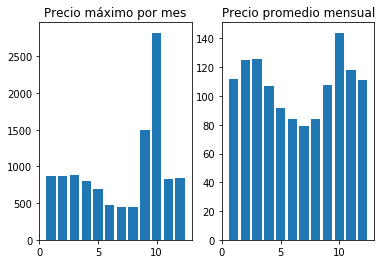

In [38]:
Precio_max = Datos3.groupby('Mes')['Precio'].max()
Precio_prom = Datos3.groupby('Mes')['Precio'].mean()
plt.subplot(1, 2,1)
plt.bar(Precio_max.index, Precio_max)
plt.title("Precio máximo por mes")
plt.subplot(1, 2,2)
plt.bar(Precio_prom.index, Precio_prom)
plt.title("Precio promedio mensual")


**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

Text(0, 0.5, 'Numero de ocurrencias')

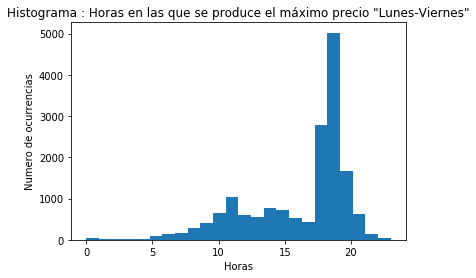

In [44]:
Datos4 = Datos2.copy()
Datos4['Fecha'] = pd.to_datetime(Datos4['Fecha'])
Datos4['Dia'] =  Datos4[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
Datos5 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
Datos6 = Datos4[(Datos4['Dia'] == 'Monday') | (Datos4['Dia'] == 'Tuesday')| (Datos4['Dia'] == 'Wednesday')| (Datos4['Dia'] == 'Thursday')| (Datos4['Dia'] == 'Friday')]
Datos7= Datos6.groupby('Fecha').agg({'Precio': np.max}) 
Datos7.reset_index(inplace=True)
Datos8 = pd.merge(Datos6, Datos7, on=['Fecha','Precio'], how='inner')

Datos9 = list(map(int,Datos8['Hora'].tolist()))
plt.hist(Datos9, bins=24)
plt.title('Histograma : Horas en las que se produce el máximo precio "Lunes-Viernes"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

Text(0, 0.5, 'Numero de ocurrencias')

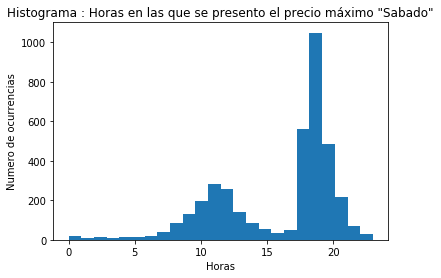

In [45]:
Datos4 = Datos2.copy()
Datos4['Fecha'] = pd.to_datetime(Datos4['Fecha'])
Datos4['Dia'] =  Datos4[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
Datos5 = Datos4[(Datos4['Dia'] == 'Saturday') ]
Datos6 = Datos5.groupby('Fecha').agg({'Precio': np.max}) 
Datos6.reset_index(inplace=True)
Datos7 = pd.merge(Datos5, Datos6, on=['Fecha','Precio'], how='inner')
Datos8 = list(map(int,Datos7['Hora'].tolist()))
plt.hist(Datos8, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Sabado"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')



**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

Text(0, 0.5, 'Numero de ocurrencias')

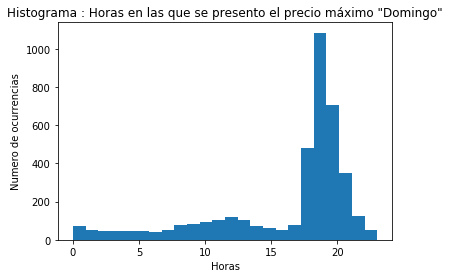

In [46]:
Datos4 = Datos2.copy()
Datos4['Fecha'] = pd.to_datetime(Datos4['Fecha'])
Datos4['Dia'] =  Datos4[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
Datos5 = Datos4[(DatosPorDia['Dia'] == 'Sunday') ]
Datos6 = Datos5.groupby('Fecha').agg({'Precio': np.max}) 
Datos6.reset_index(inplace=True)
Datos7 = pd.merge(Datos5, Datos6, on=['Fecha','Precio'], how='inner')
Datos8 = list(map(int,Datos7['Hora'].tolist()))
plt.hist(Datos8, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Domingo"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [47]:
Datos4 = Datos2.copy()
Datos4['Fecha'] = pd.to_datetime(Datos4['Fecha'])
Datos4['Año'] =  Datos4[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
Datos6 = Datos4.groupby('Año').agg({'Precio': np.min}) 
Datos6.reset_index(inplace=True)
Datos6.columns = ["Año","Min_Precio"]
Datos7= pd.merge(Datos6, Datos4, on = ['Año'], how ='inner')
Datos7= Datos7[(Datos7['Min_Precio'] == Datos7['Precio'])]
print(Datos7[['Fecha','Min_Precio']].drop_duplicates())

            Fecha  Min_Precio
7      1995-07-28    0.000000
10     1995-07-31    0.000000
11     1995-08-01    0.000000
84     1995-10-13    0.000000
338    1995-07-29    0.000000
339    1995-07-30    0.000000
3800   1995-07-26    0.000000
4140   1996-06-30    0.000000
4149   1996-07-09    0.000000
4152   1996-07-12    0.000000
4162   1996-07-22    0.000000
4163   1996-07-23    0.000000
4164   1996-07-24    0.000000
4876   1996-07-04    0.000000
5981   1996-07-11    0.000000
7749   1996-05-10    0.000000
9651   1996-07-21    0.000000
12566  1996-07-08    0.000000
13668  1997-07-15   10.882310
21695  1998-07-12   13.847330
21696  1998-07-13   13.847330
21697  1998-07-14   13.847330
21698  1998-07-15   13.847330
21699  1998-07-16   13.847330
21701  1998-07-18   13.847330
21702  1998-07-19   13.847330
21703  1998-07-20   13.847330
21704  1998-07-21   13.847330
21705  1998-07-22   13.847330
21706  1998-07-23   13.847330
...           ...         ...
32539  1999-03-28   18.359530
37652  199

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

<Figure size 1440x1440 with 0 Axes>

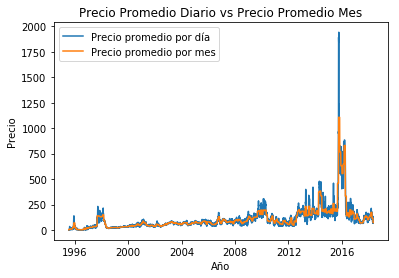

In [49]:
Datos4 = Datos2.copy()
Datos4['Fecha'] = pd.to_datetime(Datos4['Fecha'])
Datos4['Mes'] =  Datos4[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
Datos4['Año'] =  Datos4[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
Datos5= Datos4.groupby(['Mes','Año']).agg({'Precio': np.mean}) 
Datos5.reset_index(inplace=True)
Datos5.columns = ['Mes','Año','Promedio_Por_Mes']

Datos6 = pd.merge(Datos5, Datos4, on = ['Mes','Año'], how ='inner')

Datos7 = Datos2.copy()
Datos7['Fecha'] = pd.to_datetime(Datos7['Fecha'])
Datos7 = Datos7.groupby('Fecha').agg({'Precio': np.mean}) 
Datos7.reset_index(inplace=True)
Datos7.columns = ['Fecha','Precio_Por_Dia']

Datos6 = pd.merge(Datos5, Datos4, on = ['Mes','Año'], how ='inner')
Datos6 = pd.merge(Datos6, Datos7, on = ['Fecha'], how ='inner')
Datos8= Datos6.groupby('Fecha').agg({'Precio_Por_Dia': np.mean,'Promedio_Por_Mes': np.mean})

plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((Datos8.index.tolist()), Datos8['Precio_Por_Dia'], label="Precio promedio por día")
ax.plot((Datos8.index.tolist()), Datos8['Promedio_Por_Mes'], label="Precio promedio por mes")
plt.xlabel("Año")
plt.ylabel("Precio")
ax.set_title('Precio Promedio Diario vs Precio Promedio Mes')
ax.legend()